<a href="https://colab.research.google.com/github/GildoFilhoAntonio/ProcessMining/blob/main/Coortes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
# Carregar o arquivo Excel
file_path = "/content/drive/MyDrive/Mestrado/dados/CC_Brasil.xlsx"
df_cc_brasil = pd.read_excel(file_path)

# Exibir as primeiras linhas para entender a estrutura
df_cc_brasil.head()

,Código da Instituição,Nome da Instituição,Categoria Administrativa,Organização Acadêmica,Código do Curso de Graduação,Nome do Curso de Graduação,Código da Região Geográfica do Curso,Código da Unidade Federativa do Curso,Código do Município do Curso,Grau Acadêmico,...,Quantidade de Ingressantes no Curso,Quantidade de Permanência no Curso no ano de referência,Quantidade de Concluintes no Curso no ano de referência,Quantidade de Desistência no Curso no ano de referência,Quantidade de Falecimentos no Curso no ano de referência,Indicadores de Trajetória,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Taxa de Permanência - TAP,Taxa de Conclusão Acumulada - TCA,Taxa de Desistência Acumulada - TDA,Taxa de Conclusão Anual - TCAN,Taxa de Desistência Anual - TDAN
1,1.0,UNIVERSIDADE FEDERAL DE MATO GROSSO,1.0,1.0,36.0,CIÊNCIA DA COMPUTAÇÃO,5.0,51.0,5103403.0,1.0,...,57.0,56.0,0.0,1.0,0.0,98.245614,0,1.754386,0,1.754386
2,1.0,UNIVERSIDADE FEDERAL DE MATO GROSSO,1.0,1.0,36.0,CIÊNCIA DA COMPUTAÇÃO,5.0,51.0,5103403.0,1.0,...,57.0,52.0,0.0,4.0,0.0,91.22807,0,8.77193,0,7.017544
3,1.0,UNIVERSIDADE FEDERAL DE MATO GROSSO,1.0,1.0,36.0,CIÊNCIA DA COMPUTAÇÃO,5.0,51.0,5103403.0,1.0,...,57.0,47.0,3.0,2.0,0.0,82.45614,5.263158,12.280702,5.263158,3.508772
4,1.0,UNIVERSIDADE FEDERAL DE MATO GROSSO,1.0,1.0,36.0,CIÊNCIA DA COMPUTAÇÃO,5.0,51.0,5103403.0,1.0,...,57.0,34.0,6.0,7.0,0.0,59.649123,15.789474,24.561404,10.526316,12.280702


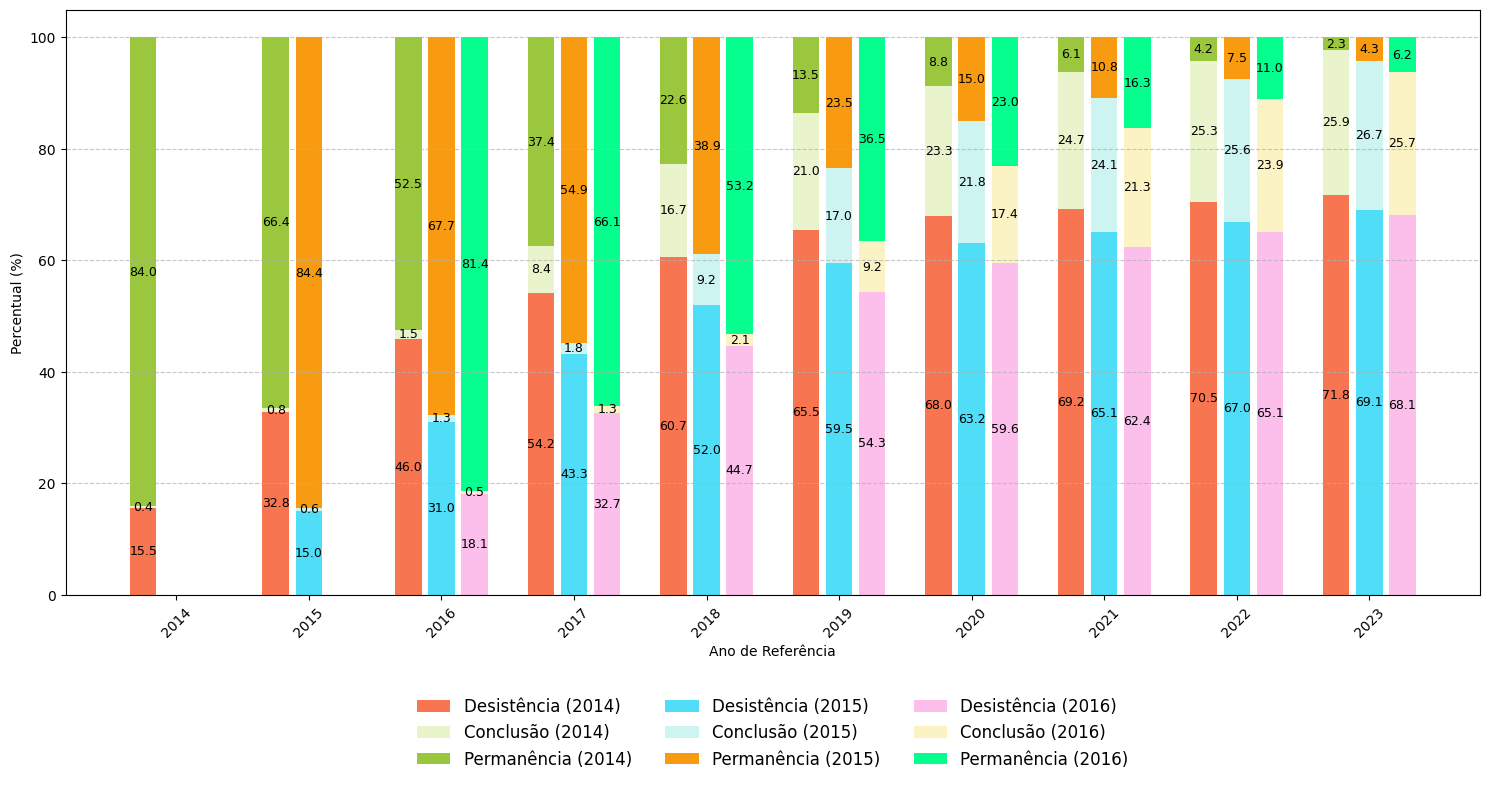

In [ ]:
# Remover a primeira linha (caso seja cabeçalho duplicado) e linhas com muitos NaNs
df_cc_brasil_clean = df_cc_brasil.dropna(subset=["Ano de Ingresso", "Ano de Referência"])
df_cc_brasil_clean = df_cc_brasil_clean.copy()

# Normalizar nomes de colunas para acesso mais fácil
df_cc_brasil_clean.rename(columns={
    "Ano de Ingresso": "ano_ingresso",
    "Ano de Referência": "ano_referencia",
    "Indicadores de Trajetória": "TAP",
    "Unnamed: 27": "TCA",
    "Unnamed: 28": "TDA",
    "Modalidade de Ensino": "TP_MODALIDADE_ENSINO"
}, inplace=True)

# Converter colunas para tipos apropriados
df_cc_brasil_clean["ano_ingresso"] = df_cc_brasil_clean["ano_ingresso"].astype(int)
df_cc_brasil_clean["ano_referencia"] = df_cc_brasil_clean["ano_referencia"].astype(int)
df_cc_brasil_clean["TAP"] = pd.to_numeric(df_cc_brasil_clean["TAP"], errors='coerce')
df_cc_brasil_clean["TCA"] = pd.to_numeric(df_cc_brasil_clean["TCA"], errors='coerce')
df_cc_brasil_clean["TDA"] = pd.to_numeric(df_cc_brasil_clean["TDA"], errors='coerce')
df_cc_brasil_clean["TP_MODALIDADE_ENSINO"] = df_cc_brasil_clean["TP_MODALIDADE_ENSINO"].astype(int)

# Filtrar apenas cursos presenciais
df_cc_brasil_presencial = df_cc_brasil_clean[df_cc_brasil_clean["TP_MODALIDADE_ENSINO"] == 1]
df_cc_brasil_clean = df_cc_brasil_presencial.copy()

# Filtrar coortes específicas
df_filtrado = df_cc_brasil_clean[df_cc_brasil_clean["ano_ingresso"].isin([2014, 2015, 2016])]
df_agrupado = df_filtrado.groupby(["ano_ingresso", "ano_referencia"])[["TAP", "TCA", "TDA"]].mean().reset_index()

# Pivotar dados
df_pivot = df_agrupado.pivot(index="ano_referencia", columns="ano_ingresso", values=["TAP", "TCA", "TDA"])

# Cores específicas por ano e categoria
cores = {
    "TDA_2014": "#f77550",  # Desistência
    "TCA_2014": "#e9f4cd",  # Conclusão
    "TAP_2014": "#9ac73d",  # Permanência

    "TDA_2015": "#50ddf7",
    "TCA_2015": "#cdf4f0",
    "TAP_2015": "#f99b10",

    "TDA_2016": "#fcbfeb",
    "TCA_2016": "#fcf3c5",
    "TAP_2016": "#06fe8f",
}

# Plotar gráfico
fig, ax = plt.subplots(figsize=(15, 8))
bar_width = 0.2
anos_ref = df_pivot.index
deslocamento = {"2014": -0.25, "2015": 0, "2016": 0.25}

for ano in [2014, 2015, 2016]:
    tda = df_pivot["TDA"][ano].fillna(0)
    tca = df_pivot["TCA"][ano].fillna(0)
    tap = df_pivot["TAP"][ano].fillna(0)
    desloc = deslocamento[str(ano)]
    pos_x = anos_ref + desloc

    ax.bar(pos_x, tda, color=cores[f"TDA_{ano}"], width=bar_width, label=f'Desistência ({ano})')
    ax.bar(pos_x, tca, bottom=tda, color=cores[f"TCA_{ano}"], width=bar_width, label=f'Conclusão ({ano})')
    ax.bar(pos_x, tap, bottom=tda + tca, color=cores[f"TAP_{ano}"], width=bar_width, label=f'Permanência ({ano})')

    # Rótulos dentro das barras
    for x, y1, y2, y3 in zip(pos_x, tda, tca, tap):
        if y1 > 0:
            ax.text(x, y1 / 2, f"{y1:.1f}", ha='center', va='center', fontsize=9)
        if y2 > 0:
            ax.text(x, y1 + y2 / 2, f"{y2:.1f}", ha='center', va='center', fontsize=9)
        if y3 > 0:
            ax.text(x, y1 + y2 + y3 / 2, f"{y3:.1f}", ha='center', va='center', fontsize=9)

# Rótulos e estética
ax.set_xlabel("Ano de Referência")
ax.set_ylabel("Percentual (%)")
ax.set_xticks(anos_ref)
ax.set_xticklabels(anos_ref, rotation=45)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=12, frameon=False)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
# plt.savefig("grafico_coortes_colorido.pdf", format="pdf", bbox_inches='tight')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo Excel
file_path = "/content/drive/MyDrive/Mestrado/dados/CC_quixada.xlsx"
df_cc_quixada = pd.read_excel(file_path)

# Exibir as primeiras linhas para entender a estrutura
df_cc_quixada.head()


,Código da Instituição,Nome da Instituição,Categoria Administrativa,Organização Acadêmica,Código do Curso de Graduação,Nome do Curso de Graduação,Código da Região Geográfica do Curso,Código da Unidade Federativa do Curso,Código do Município do Curso,Grau Acadêmico,...,Quantidade de Ingressantes no Curso,Quantidade de Permanência no Curso no ano de referência,Quantidade de Concluintes no Curso no ano de referência,Quantidade de Desistência no Curso no ano de referência,Quantidade de Falecimentos no Curso no ano de referência,Indicadores de Trajetória,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Taxa de Permanência - TAP,Taxa de Conclusão Acumulada - TCA,Taxa de Desistência Acumulada - TDA,Taxa de Conclusão Anual - TCAN,Taxa de Desistência Anual - TDAN
1,CO_IES,NO_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,CO_CURSO,NO_CURSO,CO_REGIAO,CO_UF,CO_MUNICIPIO,TP_GRAU_ACADEMICO,...,QT_INGRESSANTE,QT_PERMANENCIA,QT_CONCLUINTE,QT_DESISTENCIA,QT_FALECIDO,TAP,TCA,TDA,TCAN,TADA
2,583,UNIVERSIDADE FEDERAL DO CEARÁ,1,1,1270596,CIÊNCIA DA COMPUTAÇÃO,2,23,2311306,1,...,42,26,0,16,0,61.904762,0,38.095238,0,38.095238
3,583,UNIVERSIDADE FEDERAL DO CEARÁ,1,1,1270596,CIÊNCIA DA COMPUTAÇÃO,2,23,2311306,1,...,42,21,0,5,0,50,0,50,0,11.904762
4,583,UNIVERSIDADE FEDERAL DO CEARÁ,1,1,1270596,CIÊNCIA DA COMPUTAÇÃO,2,23,2311306,1,...,42,14,0,7,0,33.333333,0,66.666667,0,16.666667


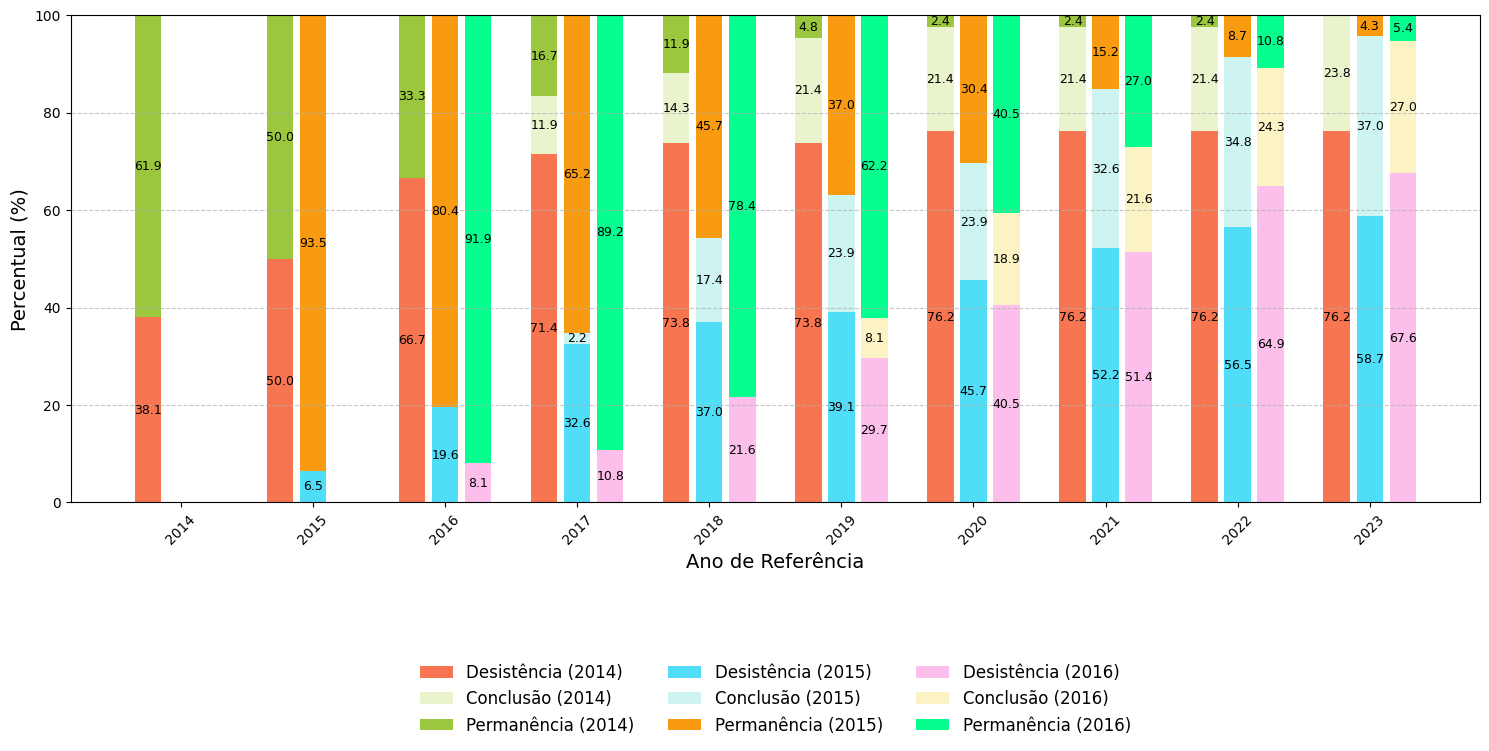

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Renomear e selecionar as colunas
df_fluxo = df_cc_quixada.rename(columns={
    'Ano de Referência': 'Ano',
    'Ano de Ingresso': 'Coorte',
    'Indicadores de Trajetória': 'Permanência',
    'Unnamed: 27': 'Conclusão',
    'Unnamed: 28': 'Desistência'
})[['Ano', 'Coorte', 'Permanência', 'Conclusão', 'Desistência']].copy()

# Conversão de tipos
df_fluxo['Ano'] = pd.to_numeric(df_fluxo['Ano'], errors='coerce').astype('Int64')
df_fluxo['Coorte'] = pd.to_numeric(df_fluxo['Coorte'], errors='coerce').astype('Int64')
df_fluxo['Permanência'] = pd.to_numeric(df_fluxo['Permanência'], errors='coerce')
df_fluxo['Conclusão'] = pd.to_numeric(df_fluxo['Conclusão'], errors='coerce')
df_fluxo['Desistência'] = pd.to_numeric(df_fluxo['Desistência'], errors='coerce')

# Remover entradas com ano ou coorte ausente
df_fluxo.dropna(subset=['Ano', 'Coorte'], inplace=True)

# Pivotar os dados
df_pivot = df_fluxo.pivot_table(
    index='Ano',
    columns='Coorte',
    values=['Permanência', 'Conclusão', 'Desistência'],
    aggfunc='sum'
).sort_index(axis=1)

# Cores personalizadas por coorte e categoria
cores = {
    # Coorte 2014 – tons de cinza
    "TDA_2014": "#f77550",
    "TCA_2014": "#e9f4cd",
    "TAP_2014": "#9ac73d",

    # Coorte 2015 – tons de azul claro
    "TDA_2015": "#50ddf7",
    "TCA_2015": "#cdf4f0",
    "TAP_2015": "#f99b10",

    # Coorte 2016 – tons de azul médio
    "TDA_2016": "#fcbfeb",
    "TCA_2016": "#fcf3c5",
    "TAP_2016": "#06fe8f",
}

# Configurações do gráfico
fig, ax = plt.subplots(figsize=(15, 8))
bar_width = 0.2
anos = df_pivot.index
deslocamento = {-0.25: 2014, 0: 2015, 0.25: 2016}

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# ... (tudo igual até o plot)

# Plotar as barras
for desloc, coorte in deslocamento.items():
    tda = df_pivot['Desistência'].get(coorte, pd.Series(0, index=anos)).fillna(0)
    tca = df_pivot['Conclusão'].get(coorte, pd.Series(0, index=anos)).fillna(0)
    tap = df_pivot['Permanência'].get(coorte, pd.Series(0, index=anos)).fillna(0)

    x = [ano + desloc for ano in anos]

    ax.bar(x, tda, width=bar_width, color=cores[f"TDA_{coorte}"])
    ax.bar(x, tca, bottom=tda, width=bar_width, color=cores[f"TCA_{coorte}"])
    ax.bar(x, tap, bottom=tda + tca, width=bar_width, color=cores[f"TAP_{coorte}"])

    for i, ano in enumerate(anos):
        y1, y2, y3 = tda.iloc[i], tca.iloc[i], tap.iloc[i]
        xpos = ano + desloc
        if y1 > 0:
            ax.text(xpos, y1 / 2, f"{y1:.1f}", ha='center', va='center', fontsize=9, color='black')
        if y2 > 0:
            ax.text(xpos, y1 + y2 / 2, f"{y2:.1f}", ha='center', va='center', fontsize=9, color='black')
        if y3 > 0:
            ax.text(xpos, y1 + y2 + y3 / 2, f"{y3:.1f}", ha='center', va='center', fontsize=9, color='black')

# Criar legenda manual com cores de todas as coortes e categorias
legend_elements = [
    Patch(facecolor=cores["TDA_2014"], label="Desistência (2014)"),
    Patch(facecolor=cores["TCA_2014"], label="Conclusão (2014)"),
    Patch(facecolor=cores["TAP_2014"], label="Permanência (2014)"),
    Patch(facecolor=cores["TDA_2015"], label="Desistência (2015)"),
    Patch(facecolor=cores["TCA_2015"], label="Conclusão (2015)"),
    Patch(facecolor=cores["TAP_2015"], label="Permanência (2015)"),
    Patch(facecolor=cores["TDA_2016"], label="Desistência (2016)"),
    Patch(facecolor=cores["TCA_2016"], label="Conclusão (2016)"),
    Patch(facecolor=cores["TAP_2016"], label="Permanência (2016)"),
]

# Ajustes do gráfico
ax.set_xlabel('Ano de Referência', fontsize=14)
ax.set_ylabel('Percentual (%)', fontsize=14)
ax.set_xticks(anos)
ax.set_xticklabels(anos, rotation=45)
ax.legend(
    handles=legend_elements,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.30),
    ncol=3,
    fontsize=12,
    frameon=False
)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Salvar em PDF
plt.tight_layout()
#plt.savefig("fluxo_cc_quixada_coortes_valores.pdf", format='pdf', bbox_inches='tight')
plt.show()

